In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [41]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

### Data Open

In [20]:
df=pd.read_csv("data/BigData/DIABETES.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
Y              442 non-null int64
AGE            442 non-null int64
GENDER         442 non-null int64
BMI            442 non-null float64
BP             442 non-null float64
CHOLESTEROL    442 non-null int64
LDL            442 non-null float64
HDL            442 non-null float64
TCH            442 non-null float64
LTG            442 non-null float64
GLUCOSE        442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [21]:
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [22]:
df_y=df['Y']
df_x = df.drop('Y',axis=1)


In [23]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(309, 10)
train data Y size :(309,)
test data X size :(133, 10)
test data Y size :(133,)


# 회귀모델

In [55]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "Y ~ GENDER + BMI + HDL + TCH + LTG", data = df)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     80.55
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           9.30e-60
Time:                        14:23:59   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4817.
Df Residuals:                     436   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -186.1265     37.219     -5.001      0.0

# 의사결정나무

In [24]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 10, min_samples_split=18, max_depth=2,
                                  random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=18, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

# 랜덤포레스트

In [25]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=10, min_samples_split=20, max_depth=3)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.559
Score on test set : 0.491


# 그래디언트 부스팅

In [26]:
gb_final = GradientBoostingRegressor(random_state=1, n_estimators=30, min_samples_leaf=10, 
                                     min_samples_split=28, max_depth=3, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set :0.681
Score on test set : 0.508


In [27]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [28]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [56]:
models=["회귀분석","의사결정나무","랜덤포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape=[],[],[],[]

In [57]:
lr_y_pred=reg_result.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [58]:
dt_y_pred=tree_final.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [59]:
rf_y_pred=rf_final.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [60]:
gb_y_pred=gb_final.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

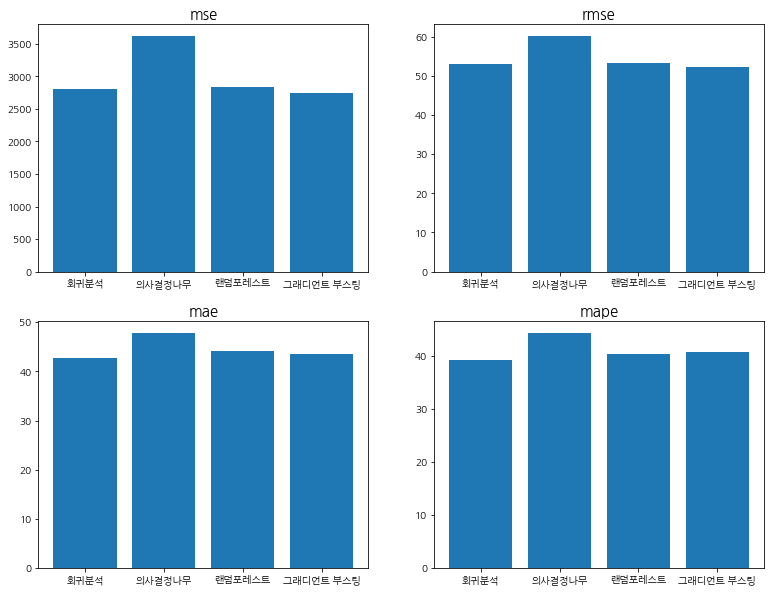

In [61]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)